In [ ]:
###  *******************************
#https://upscfever.com/upsc-fever/en/data/deeplearning4/22.html

In [ ]:
#https://leimao.github.io/blog/Bounding-Box-Encoding-Decoding/
#https://www.wovenware.com/blog/2020/06/anchor-boxes-in-object-detection-when-where-and-how-to-propose-them-for-deep-learning-apps/
#https://d2l.ai/chapter_computer-vision/anchor.html
#https://www.wovenware.com/blog/2020/06/anchor-boxes-in-object-detection-when-where-and-how-to-propose-them-for-deep-learning-apps/
#https://www.kdnuggets.com/2018/05/implement-yolo-v3-object-detector-pytorch-part-1.html



In [ ]:
from google.colab import drive
drive.mount('/Anchor')

Drive already mounted at /Anchor; to attempt to forcibly remount, call drive.mount("/Anchor", force_remount=True).


In [ ]:
#### must do it ###########
!pip install d2l==0.16.1

     |████████████████████████████████| 81kB 4.0MB/s 


In [ ]:
############### must do it #####################
!pip install -U mxnet-cu101==1.7.0

     |███████████████████████████████▌| 834.1MB 1.3MB/s eta 0:00:09tcmalloc: large alloc 1147494400 bytes == 0x55cde687e000 @  0x7fec1386e615 0x55cdada3806c 0x55cdadb17eba 0x55cdada3ae8d 0x55cdadb2c99d 0x55cdadaaefe9 0x55cdadaa9b0e 0x55cdada3c77a 0x55cdadaaee50 0x55cdadaa9b0e 0x55cdada3c77a 0x55cdadaab86a 0x55cdadb2d7c6 0x55cdadaaaee2 0x55cdadb2d7c6 0x55cdadaaaee2 0x55cdadb2d7c6 0x55cdadaaaee2 0x55cdadb2d7c6 0x55cdadaaaee2 0x55cdada3c69a 0x55cdadaaac9e 0x55cdadaa9e0d 0x55cdada3c77a 0x55cdadaaaa45 0x55cdada3c69a 0x55cdadaaaa45 0x55cdadaa9b0e 0x55cdada3c77a 0x55cdadaab86a 0x55cdadaa9b0e
     |████████████████████████████████| 846.0MB 12kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
%matplotlib inline
from d2l import torch as d2l
import torch
import cv2
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from mxnet import gluon,np,npx,image
import numpy

np.set_printoptions(2)
npx.set_np()

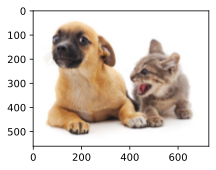

In [ ]:
d2l.set_figsize()
path='/Anchor/MyDrive/faster_RCNN/catdog.jpg'
img = image.imread(path).asnumpy()
plt.imshow(img)
#print('img : \n',img)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


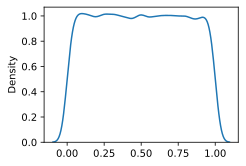

In [ ]:
#https://www.w3schools.com/python/numpy_random_uniform.asp

sns.distplot(random.uniform(size=(100,300,2)), hist=False)
plt.show()

In [ ]:
h1,w1=img.shape[0:2]
print('h1 : ',h1,'    w1 : ',w1)
#https://towardsdatascience.com/discover-the-link-between-math-and-data-science-problems-a98fe9866a4f
#here 4=row    and  5=column 
#1*3 =3 that means row(4),column(5) gulo mot 3 bar print hobe 1 ta array er moddhe      
x1=np.random.uniform(size=(1,3,4,5))  #construct input data
print('x1  :  \n',x1)

h1 :  561     w1 :  728
x1  :  
 [[[[0.55 0.59 0.72 0.84 0.6 ]
   [0.86 0.54 0.85 0.42 0.62]
   [0.65 0.38 0.44 0.3  0.89]
   [0.06 0.96 0.27 0.38 0.48]]

  [[0.79 0.81 0.53 0.48 0.57]
   [0.39 0.93 0.84 0.07 0.34]
   [0.09 0.65 0.02 0.37 0.83]
   [0.96 0.78 0.14 0.87 0.87]]

  [[0.98 0.47 0.8  0.8  0.46]
   [0.52 0.78 0.68 0.12 0.72]
   [0.64 0.58 0.14 0.54 0.94]
   [0.76 0.52 0.11 0.41 0.47]]]]


In [ ]:
tensor_=d2l.tensor(5)
print('tensor_ : ',tensor_)
tensor_

tensor_ :  tensor(5)


tensor(5)

In [ ]:
#https://www.geeksforgeeks.org/numpy-meshgrid-function/
a=np.linspace(-4,4,9)
print('a : ',a)
b=np.linspace(-5,5,11)
print('b : ',b)
a_1,b_1=np.meshgrid(a,b)
print('a_1 : ######################################################\n',a_1)
print('b_1 : ######################################################\n',b_1)
#### convert the a_1 into 1D array using .reshape(-1) method
a_1=a_1.reshape(-1)
b_1=b_1.reshape(-1)
print('reshape of a_1 : #############################################\n',a_1.reshape(-1))
#####  axis =1 er jonno value ulo column wise store hobe ,,,ta na hole row wise store hobe ################
g1=np.stack([a_1,b_1,a_1,b_1],axis=1)#.repeat(5,axis=0)
print('g1 : \n',g1)
g1=np.stack([a_1,b_1,a_1,b_1],axis=1).repeat(5,axis=0)
print('g1 : \n',g1)

a :  [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
b :  [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
a_1 : ######################################################
 [[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]]
b_1 : ######################################################
 [[-5. -5. -5. -5. -5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 

In [ ]:
#https://www.geeksforgeeks.org/numpy-tile-python/
arr=np.arange(3)
print("arr : \n", arr) 
a=2
b=2
repetitions=(a,b)
print("\nRepeating arr : \n", np.tile(arr, repetitions)) 
print("arr Shape : \n", np.tile(arr, repetitions).shape) 
a = 3  
b = 4   
repetitions = (a, b) 
a1=np.tile(arr, repetitions)
print("\nRepeating arr : \n", np.tile(arr, repetitions)) 
print("arr Shape : \n", np.tile(arr, repetitions).shape)
a = 2
b = 3  
repetitions = (a, b) 
b1=np.tile(arr, repetitions)
print("\nRepeating arr : \n", np.tile(arr, repetitions)) 
print("arr Shape : \n", np.tile(arr, repetitions).shape) 
a = 2
b = 3
repetitions = (a, b) 
#arr er value gulo k 2 dia divide kortesi
print("\nRepeating arr : \n", np.tile(arr, repetitions)/2) 
print("arr Shape : \n", np.tile(arr, repetitions).shape) 
out_grid1=np.stack([a1,b1],axis=1)
#print('out_grid ###################################################\n',out_grid1)

arr : 
 [0. 1. 2.]

Repeating arr : 
 [[0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2.]]
arr Shape : 
 (2, 6)

Repeating arr : 
 [[0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2.]]
arr Shape : 
 (3, 12)

Repeating arr : 
 [[0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2.]]
arr Shape : 
 (2, 9)

Repeating arr : 
 [[0.  0.5 1.  0.  0.5 1.  0.  0.5 1. ]
 [0.  0.5 1.  0.  0.5 1.  0.  0.5 1. ]]
arr Shape : 
 (2, 9)


**With the help of Numpy.expand_dims() method, we can get the expanded dimensions of an array by using Numpy.expand_dims() method.**

In [ ]:
#https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
#https://www.geeksforgeeks.org/python-numpy-expand_dims-method/
x1=np.array([1,2])
print('x1 : ',x1,'       Shape : ',x1.shape)
# ***** np.expand_dims(x, axis=0)   equivalent to x[np.newaxis, :] or x[np.newaxis]:
y1=np.expand_dims(x1,axis=0)
print('y : ',x1,'       Shape : ',y1.shape)
#np.expand_dims(x,axis=1)     equivalent to x[:, np.newaxis]:
y1=np.expand_dims(x1,axis=1)
print('y : ',x1,'       Shape : ',y1.shape)


x1 :  [1. 2.]        Shape :  (2,)
y :  [1. 2.]        Shape :  (1, 2)
y :  [1. 2.]        Shape :  (2, 1)


**Anchor box algorithm :** 

*************** **Previously** *************

**Each object in training image is assigned to grid cell that contains that object's midpoint** (each grid cell that means j grid cell a object ase er vitore j kono point a object er midpoint must thakbe)

In [ ]:
def multibox_prior(data,sizes,ratios):
  in_height,in_width=data.shape[-2:]
  print('in_height : ',in_height,'     in_width : ',in_width)
  #data.ctx : kon dvice use korsi cpu or gpu or tpu
  device,num_sizes,num_ratios=data.ctx,len(sizes),len(ratios)
  boxes_per_pixel=(num_sizes+num_ratios-1)
  print('boxes_per_pixel : ',boxes_per_pixel,'   device : ',device)
  #ctx=device na dileo colbeeeee
  size_tensor = np.array(sizes, ctx=device)
  ratio_tensor=np.array(ratios,ctx=device)
  print('size_tensor : ',size_tensor,'     ratio_tensor : ',ratio_tensor)
  # offsets are required to move the anchor to center of a pixel
  # since pixel(height=1,width=1), we choose to offset our center by 0.5
  offset_h,offset_w=0.5,0.5
  #For example consider the width of an image = 256px = 1 unit, then a 40px wide object 
  #occupies 40px / 256px = 0.15625 units of width – the object occupies 15.62% of the total image width.
  steps_h=1.0/in_height       #scaled steps in y axis
  steps_w=1.0/in_width        #scaled steps in x axis
  print('steps_h : ',steps_h,'     steps_w : ',steps_w)
  center_h=(np.arange(in_height,ctx=device)+offset_h)*steps_h
  #print('center_h : ##########################################################\n',center_h)
  center_w=(np.arange(in_width,ctx=device)+offset_w)*steps_w
  #print('center_w : ##########################################################\n',center_w)

  shift_x,shift_y=np.meshgrid(center_w,center_h)
  print('shift_x : ##########################################################\n',shift_x)
  print('shift_y : ##########################################################\n',shift_y)

  #print('ratio_tensor[0] : ',ratio_tensor[0],'       ratio_tensor[1] :',ratio_tensor[1:])
  #### convert the shift_x and shift_y into 1D array using .reshape(-1) method
  shift_x,shift_y=shift_x.reshape(-1),shift_y.reshape(-1)
  print('After .reshape(-1) shift_x : ########################################\n',shift_x)
  print('size_tensor*np.sqrt(ratio_tensor[0]) : ',size_tensor*np.sqrt(ratio_tensor[0]))
  print('sizes[0]*np.sqrt(ratio_tensor[1:])   : ',sizes[0]*np.sqrt(ratio_tensor[1:]))
  ######### to concatenate need extra () parenthesis so, .concatenate(()) ############
  concat=np.concatenate((size_tensor*np.sqrt(ratio_tensor[0]),sizes[0]*np.sqrt(ratio_tensor[1:])))
  #Generate boxes_per_pixel number of heights and weidths which are later used to create anchor box corner
  #cordinates(Xmin,Xmax,Ymin,Ymax) concat (various sizes,first ratio) and (first size,various ratios)
  
  ######### to concatenate need extra () parenthesis so, .concatenate(()) ############
  w = np.concatenate((size_tensor*np.sqrt(ratio_tensor[0]),sizes[0]*np.sqrt(ratio_tensor[1:])))*(in_height/in_width)
  print('(size_tensor*np.sqrt(ratio_tensor[0]),sizes[0]*np.sqrt(ratio_tensor[1:]))*(in_height/in_width):',w)
  h=np.concatenate((size_tensor/np.sqrt(ratio_tensor[0]),sizes[0]/np.sqrt(ratio_tensor[1:])))
  print('concatenate(size_tensor/np.sqrt(ratio_tensor[0]),sizes[0]/np.sqrt(ratio_tensor[1:]) :',h)
  print('anchor before transpose : ###############################################\n',np.stack((-w,-h,w,h)))
  print('anchor after transpose : ###############################################\n',np.stack((-w,-h,w,h)).T)
  anchor_manipulations=np.tile(np.stack((-w,-h,w,h)).T,(in_height*in_width,1))/2
  print('anchor_manipulations ###########################################\n',anchor_manipulations)
  #each center point will have boxes_per_pixel number of anchor boxes, so
  #generate grid of all anchor box centers with boxes_per_pixel repeats
  out_gr=np.stack([shift_x,shift_y,shift_x,shift_y])
  print('out_gr ########################################################### \n',out_gr)
  out_grid=np.stack([shift_x,shift_y,shift_x,shift_y],axis=1).repeat(boxes_per_pixel,axis=0)
  print('out_grid ########################################################### \n',out_grid)
  output=out_grid+anchor_manipulations
  print('output #############################################################\n',output)
  return np.expand_dims(output,axis=0)

In [ ]:
a=np.array([[[1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10]]])
aa=a[0,:,:]
print('a : ##########################\n',a)
print('a : ##########################\n',aa[:,1:])

a : ##########################
 [[[ 1.  2.  3.  4.  5.]
  [ 6.  7.  8.  9. 10.]]]
a : ##########################
 [[ 2.  3.  4.  5.]
 [ 7.  8.  9. 10.]]


In [ ]:

h,w=img.shape[0:2]
print('h : ',h,'    w : ',w)
x=np.random.uniform(size=(1,3,h,w))  #construct input data
#https://www.wovenware.com/blog/2020/06/anchor-boxes-in-object-detection-when-where-and-how-to-propose-them-for-deep-learning-apps/
#https://upscfever.com/upsc-fever/en/data/deeplearning4/22.html
y=multibox_prior(x,sizes=[0.75,0.5,0.25],ratios=[1,2,0.5])
print(' Shape of y from multibox_prior : ',y.shape)
#print('x  :  \n',x)


h :  561     w :  728
in_height :  561      in_width :  728
boxes_per_pixel :  5    device :  cpu(0)
size_tensor :  [0.75 0.5  0.25]      ratio_tensor :  [1.  2.  0.5]
steps_h :  0.0017825311942959      steps_w :  0.0013736263736263737
shift_x : ##########################################################
 [[6.87e-04 2.06e-03 3.43e-03 ... 9.97e-01 9.98e-01 9.99e-01]
 [6.87e-04 2.06e-03 3.43e-03 ... 9.97e-01 9.98e-01 9.99e-01]
 [6.87e-04 2.06e-03 3.43e-03 ... 9.97e-01 9.98e-01 9.99e-01]
 ...
 [6.87e-04 2.06e-03 3.43e-03 ... 9.97e-01 9.98e-01 9.99e-01]
 [6.87e-04 2.06e-03 3.43e-03 ... 9.97e-01 9.98e-01 9.99e-01]
 [6.87e-04 2.06e-03 3.43e-03 ... 9.97e-01 9.98e-01 9.99e-01]]
shift_y : ##########################################################
 [[8.91e-04 8.91e-04 8.91e-04 ... 8.91e-04 8.91e-04 8.91e-04]
 [2.67e-03 2.67e-03 2.67e-03 ... 2.67e-03 2.67e-03 2.67e-03]
 [4.46e-03 4.46e-03 4.46e-03 ... 4.46e-03 4.46e-03 4.46e-03]
 ...
 [9.96e-01 9.96e-01 9.96e-01 ... 9.96e-01 9.96e-01 9.96e-01]
 [9

**Convert the following 1-D array with 12 elements into a 3-D array.**

**The outermost dimension will have 2 arrays that contains 3 arrays, each with 2 elements:**

In [ ]:
#https://www.w3schools.com/python/numpy_array_reshape.asp
#import numpy as np
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
newarr = arr.reshape(2, 3, 2)
#print(newarr)
newarr = arr.reshape(2, 3, 2,1)

arr=np.linspace(1,24,24)
newarr = arr.reshape(2,3,2,2)
print('#########################################\n',newarr)
print('################################\n',newarr[1,1,0])
arr=np.linspace(1,120,120)
newarr = arr.reshape(2,3,4,5)
#print('#########',newarr[0])
print('################################\n',newarr)

#########################################
 [[[[ 1.  2.]
   [ 3.  4.]]

  [[ 5.  6.]
   [ 7.  8.]]

  [[ 9. 10.]
   [11. 12.]]]


 [[[13. 14.]
   [15. 16.]]

  [[17. 18.]
   [19. 20.]]

  [[21. 22.]
   [23. 24.]]]]
################################
 [17. 18.]
################################
 [[[[  1.   2.   3.   4.   5.]
   [  6.   7.   8.   9.  10.]
   [ 11.  12.  13.  14.  15.]
   [ 16.  17.  18.  19.  20.]]

  [[ 21.  22.  23.  24.  25.]
   [ 26.  27.  28.  29.  30.]
   [ 31.  32.  33.  34.  35.]
   [ 36.  37.  38.  39.  40.]]

  [[ 41.  42.  43.  44.  45.]
   [ 46.  47.  48.  49.  50.]
   [ 51.  52.  53.  54.  55.]
   [ 56.  57.  58.  59.  60.]]]


 [[[ 61.  62.  63.  64.  65.]
   [ 66.  67.  68.  69.  70.]
   [ 71.  72.  73.  74.  75.]
   [ 76.  77.  78.  79.  80.]]

  [[ 81.  82.  83.  84.  85.]
   [ 86.  87.  88.  89.  90.]
   [ 91.  92.  93.  94.  95.]
   [ 96.  97.  98.  99. 100.]]

  [[101. 102. 103. 104. 105.]
   [106. 107. 108. 109. 110.]
   [111. 112. 113. 114. 115.]
   [11

In [ ]:
newarr[1,1,0:]

array([[ 81.,  82.,  83.,  84.,  85.],
       [ 86.,  87.,  88.,  89.,  90.],
       [ 91.,  92.,  93.,  94.,  95.],
       [ 96.,  97.,  98.,  99., 100.]])

In [ ]:
h,w=img.shape[0:2]
print('h : ',h,'    w : ',w)
print(' Shape of y from multibox_prior : ',y.shape)
print('y from multibox_prior ###############################################\n',y)
boxes=y.reshape(h,w,5,4)
print('boxes_shape ###############################################################\n',boxes.shape)
#print('boxes ###############################################################\n',boxes)
print('boxes[250,250,0,:] : ',boxes[250,250,0,:])
print('boxes[250,250,:,:] : ################################## \n',boxes[250,250,:,:])


h :  561     w :  728
 Shape of y from multibox_prior :  (1, 2042040, 4)
y from multibox_prior ###############################################
 [[[-0.29 -0.37  0.29  0.38]
  [-0.19 -0.25  0.19  0.25]
  [-0.1  -0.12  0.1   0.13]
  ...
  [ 0.9   0.87  1.1   1.12]
  [ 0.59  0.73  1.41  1.26]
  [ 0.79  0.47  1.2   1.53]]]
boxes_shape ###############################################################
 (561, 728, 5, 4)
boxes[250,250,0,:] :  [0.06 0.07 0.63 0.82]
boxes[250,250,:,:] : ################################## 
 [[ 0.06  0.07  0.63  0.82]
 [ 0.15  0.2   0.54  0.7 ]
 [ 0.25  0.32  0.44  0.57]
 [-0.06  0.18  0.75  0.71]
 [ 0.14 -0.08  0.55  0.98]]


In [ ]:
def show_bboxes(axes, bboxes, labels=None, colors=None):
  def _make_list(obj, default_values=None):
    #print('inside _make_list obj : ',obj)
    if obj is None:
      obj = default_values
    elif not isinstance(obj, (list, tuple)):
      obj = [obj]
    print('inside _make_list obj : ',obj)
    return obj

  labels = _make_list(labels)
  colors = _make_list(colors, ['b', 'g', 'r', 'm', 'c'])
  for i,bbox in enumerate(bboxes):
    color=colors[(i%len(colors))]
    #print('i : ',i,'     bbox : ',bbox,'     colors : ',color)
    #print('label : ',labels,'     len_label',len(labels))
    rect=d2l.bbox_to_rect(bbox.asnumpy(),color)
    axes.add_patch(rect)
    if labels and len(labels) > i:
            text_color = 'k' if color == 'w' else 'w'
            axes.text(rect.xy[0],
                      rect.xy[1],
                      labels[i],
                      va='center',
                      ha='center',
                      fontsize=9,
                      color=text_color,
                      bbox=dict(facecolor=color, lw=0))

fig.axes :  AxesSubplot(0.125,0.125;0.775x0.755)
inside _make_list obj :  ['s=0.75, r=1', 's=0.5, r=1', 's=0.25, r=1', 's=0.75, r=2', 's=0.75, r=0.5']
inside _make_list obj :  ['b', 'g', 'r', 'm', 'c']
bbox_scale :  [728. 561. 728. 561.]
boxes[250, 250, :, :] * bbox_scale :  [[ 40.13  40.12 460.88 460.87]
 [110.25 110.25 390.75 390.75]
 [180.38 180.38 320.62 320.62]
 [-47.02 101.74 548.02 399.26]
 [101.74 -47.02 399.26 548.02]]


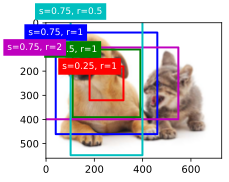

In [ ]:
d2l.set_figsize()
bbox_scale = np.array((w, h, w, h))
fig = d2l.plt.imshow(img)
print('fig.axes : ',fig.axes)
show_bboxes(fig.axes, boxes[250, 250, :, :] * bbox_scale,
            ['s=0.75, r=1', 's=0.5, r=1', 's=0.25, r=1', 's=0.75, r=2',
             's=0.75, r=0.5'])
print('bbox_scale : ',bbox_scale)
print('boxes[250, 250, :, :] * bbox_scale : ',boxes[250, 250, :, :] * bbox_scale)

In [ ]:
print(isinstance(4,int))
l=[1,2,3]
print(isinstance(l,(list,tuple)))
l=[l]
print('l : ',l)

True
True
l :  [[1, 2, 3]]


In [ ]:
#https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/
# Python code to illustrate cube of a number 
# showing difference between def() and lambda(). 
def cube(y): 
    return y*y*y  
lambda_cube = lambda y: y*y*y 
# using the normally 
# defined function 
print(cube(5)) 
# using the lamda function 
print(lambda_cube(5)) 

125
125


**Why Use Lambda Functions?**

The power of lambda is better shown when you use them as an anonymous function inside another function.

Say you have a function definition that takes one argument, and that argument will be multiplied with an unknown number:

In [ ]:
#https://www.w3schools.com/python/python_lambda.asp
#A lambda function is a small anonymous function.
#A lambda function can take any number of arguments, but can only have one expression.
#lambda arguments : expression,  #######  The expression is executed and the result is returned:
x=lambda a:a+10
# Here a is the parameter
print('x=lambda a:a+10          -> ',x(3))
mul=lambda a,b:a*b 
print('mul=lambda a,b:a*b       -> ',mul(5,6))
sum_=lambda a,b,c:a+b+c
print('sum_=lambda a,b,c:a+b+c  -> ',sum_(2,3,5))
print('################################')

def myfunc(n):
  return lambda a : a * n
mydoubler = myfunc(2)
mytripler = myfunc(3)
print(mydoubler(11))
print(mytripler(11))

x=lambda a:a+10          ->  13
mul=lambda a,b:a*b       ->  30
sum_=lambda a,b,c:a+b+c  ->  10
################################
22
33
